In [1]:
import gensim.downloader as api

wv = api.load('word2vec-google-news-300')

print(wv)

KeyedVectors<vector_size=300, 3000000 keys>


In [2]:
from gensim.models import KeyedVectors

# Save the model to a binary file
wv.save_word2vec_format('word2vec_model.bin', binary=True)

In [3]:
# Load the model using memory-mapped files
import gensim
word2vec_model_path = "word2vec_model.bin"
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_model_path, binary=True)

In [4]:
!pip install tensorflow scikit-learn


In [5]:
# Download and load the dataset
import gensim
import gdown
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

# Load your data here (train_data, valid_data, test_data)
# Load word2vec model (word2vec_model)

train_url = "https://drive.google.com/uc?export=download&id=1Pa-6DXYm_pfIte5KKAcKd-aECWzq5cPy"
valid_url = "https://drive.google.com/uc?export=download&id=1BDhkyqt9JmSLFpWKMFe7w7HAwTpfQfSf"
test_url = "https://drive.google.com/uc?export=download&id=1u4wx-OiwoKSXn8vSSGPGEpCDkiqKwDWd"

gdown.download(train_url, "NLP_ass_train.tsv", quiet=False)
gdown.download(valid_url, "NLP_ass_valid.tsv", quiet=False)
gdown.download(test_url, "NLP_ass_test.tsv", quiet=False)

# Load the data
train_data = pd.read_csv("NLP_ass_train.tsv", sep='\t', header=None)
valid_data = pd.read_csv("NLP_ass_valid.tsv", sep='\t', header=None)
test_data = pd.read_csv("NLP_ass_test.tsv", sep='\t', header=None)

# Preprocess the comments
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = word_tokenize(text.lower())  # Tokenize and convert to lowercase
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return words

train_data[0] = train_data[0].apply(lambda x: preprocess_text(x))
valid_data[0] = valid_data[0].apply(lambda x: preprocess_text(x))
test_data[0] = test_data[0].apply(lambda x: preprocess_text(x))

# Encode labels
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_data[1])
valid_labels = label_encoder.transform(valid_data[1])
test_labels = label_encoder.transform(test_data[1])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Downloading...
From: https://drive.google.com/uc?export=download&id=1Pa-6DXYm_pfIte5KKAcKd-aECWzq5cPy
To: /content/NLP_ass_train.tsv
100%|██████████| 2.11M/2.11M [00:00<00:00, 119MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1BDhkyqt9JmSLFpWKMFe7w7HAwTpfQfSf
To: /content/NLP_ass_valid.tsv
100%|██████████| 263k/263k [00:00<00:00, 65.5MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1u4wx-OiwoKSXn8vSSGPGEpCDkiqKwDWd
To: /content/NLP_ass_test.tsv
100%|██████████| 261k/261k [00:00<00:00, 65.6MB/s]


**Task2**


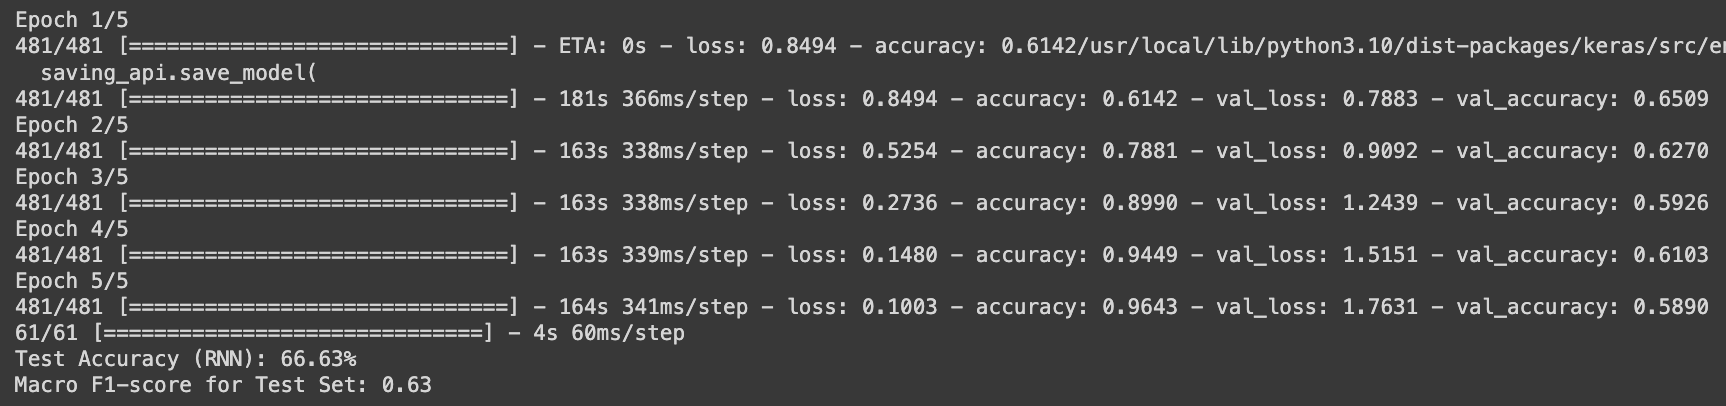

In [7]:
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dense
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# Define the maximum sequence length of your dataset
max_sequence_length = 100

# Tokenize and pad/truncate the sentences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data[0])

X_train_sequences = tokenizer.texts_to_sequences(train_data[0])
X_valid_sequences = tokenizer.texts_to_sequences(valid_data[0])
X_test_sequences = tokenizer.texts_to_sequences(test_data[0])

X_train_pad = pad_sequences(X_train_sequences, maxlen=max_sequence_length)
X_valid_pad = pad_sequences(X_valid_sequences, maxlen=max_sequence_length)
X_test_pad = pad_sequences(X_test_sequences, maxlen=max_sequence_length)

# Build the RNN model
embedding_dim = 300  # Dimensionality of the word vectors
vocab_size = len(tokenizer.word_index) + 1  # Vocabulary size

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(LSTM(128))
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Train the RNN model with early stopping based on validation loss
# checkpoint = ModelCheckpoint('best_rnn_model.h5', monitor='val_loss', save_best_only=True)
# history = model.fit(X_train_pad, train_labels, epochs=2, batch_size=32, validation_data=(X_valid_pad, valid_labels), callbacks=[checkpoint])

# # Load the best RNN model
# model.load_weights('best_rnn_model.h5')

# # Evaluate the RNN model on the test set
# test_probabilities = model.predict(X_test_pad)
# test_predictions = np.argmax(test_probabilities, axis=1)
# test_accuracy = accuracy_score(test_labels, test_predictions)
# print("Test Accuracy (RNN): {:.2f}%".format(test_accuracy * 100))





checkpoint = ModelCheckpoint('best_rnn_model.h5', monitor='val_loss', save_best_only=True)
history = model.fit(X_train_pad, train_labels, epochs=5, batch_size=32, validation_data=(X_valid_pad, valid_labels), callbacks=[checkpoint])

# Load the best RNN model
model.load_weights('best_rnn_model.h5')



# Evaluate the RNN model on the test set
test_probabilities = model.predict(X_test_pad)
test_predictions = np.argmax(test_probabilities, axis=1)
test_accuracy = accuracy_score(test_labels, test_predictions)
print("Test Accuracy (RNN): {:.2f}%".format(test_accuracy * 100))

# # Classification report for test set
# print("Classification Report for Test Set (RNN):")
# print(classification_report(test_labels, test_predictions))

# print("\n\n\n")

# # Evaluate the RNN model on the validation set
# valid_probabilities = model.predict(X_valid_pad)
# valid_predictions = np.argmax(valid_probabilities, axis=1)
# valid_accuracy = accuracy_score(valid_labels, valid_predictions)
# print("Validation Accuracy (RNN): {:.2f}%".format(valid_accuracy * 100))

# # Classification report for validation set
# print("Classification Report for Validation Set (RNN):")
# print(classification_report(valid_labels, valid_predictions))

test_labels_numeric = label_encoder.transform(test_data[1])

# Calculate F1-score using numeric labels
macro_f1 = f1_score(test_labels_numeric, test_predictions, average='macro')


# Print macro F1-score
print("Macro F1-score for Test Set: {:.2f}".format(macro_f1))

Epoch 1/5
481/481 [==============================] - ETA: 0s - loss: 0.8494 - accuracy: 0.6142

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


481/481 [==============================] - 181s 366ms/step - loss: 0.8494 - accuracy: 0.6142 - val_loss: 0.7883 - val_accuracy: 0.6509
Epoch 2/5
481/481 [==============================] - 163s 338ms/step - loss: 0.5254 - accuracy: 0.7881 - val_loss: 0.9092 - val_accuracy: 0.6270
Epoch 3/5
481/481 [==============================] - 163s 338ms/step - loss: 0.2736 - accuracy: 0.8990 - val_loss: 1.2439 - val_accuracy: 0.5926
Epoch 4/5
481/481 [==============================] - 163s 339ms/step - loss: 0.1480 - accuracy: 0.9449 - val_loss: 1.5151 - val_accuracy: 0.6103
Epoch 5/5
61/61 [==============================] - 4s 60ms/step
Test Accuracy (RNN): 66.63%
Macro F1-score for Test Set: 0.63


In [ ]:
def calculate_intersection(test_set, train_set, valid_set):
    test_sentences = set(tuple(s) for s in test_set)
    train_sentences = set(tuple(s) for s in  train_set)
    valid_sentences = set(valid_set)

    intersection_train = len(test_sentences.intersection(train_sentences))
    intersection_valid = len(test_sentences.intersection(valid_sentences))

    return intersection_train, intersection_valid

# Assuming train_data[0] contains the preprocessed sentences of the training set
# Assuming valid_data[0] contains the preprocessed sentences of the validation set
# Assuming test_data[0] contains the preprocessed sentences of the test set

intersection_train, intersection_valid = calculate_intersection(test_data[0], train_data[0], valid_data[0])

print(f"Number of common sentences between test set and train set: {intersection_train}")
print(f"Number of common sentences between test set and validation set: {intersection_valid}")